In [1]:
import pandas as pd
df= pd.read_csv('c:/dataset/wine.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
df.shape

(1599, 12)

(array([  10.,    0.,   53.,    0.,  681.,    0.,  638.,    0.,  199.,   18.]),
 array([ 3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ]),
 <a list of 10 Patch objects>)

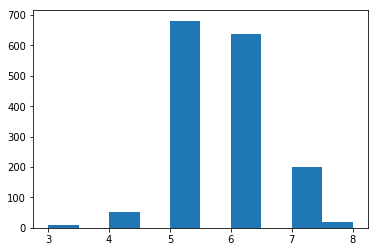

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df['quality'])

This plot indicates more than 75% of samples have rated 6 or 7 for quality

In [4]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


Some observations are:         
    * The lesser the ** volatile acidity **, the higher the wine quality      
    * The more the ** sulphates** and ** citric acid**content, the higher the wine quality   
    * The ** density** and **pH** do not vary the wine quality   

In [9]:
df_norm = (df -df.min())/(df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Hierachical clustering with sklearn

In [11]:
from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(df_norm)
md = pd.Series(ward.labels_)

First, we plot a histogram of cluster labels

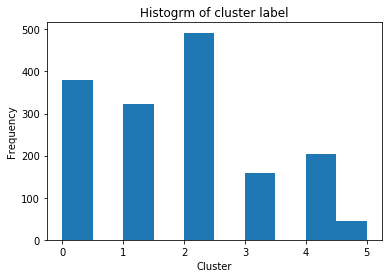

In [12]:
plt.hist(md)
plt.title('Histogrm of cluster label')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

This plot indicates the choose of 6 as a number of clusters is correct

## K-Means clustering

In [13]:
from sklearn.cluster import KMeans
from sklearn import datasets
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
model.labels_

array([0, 0, 0, ..., 3, 3, 2])

For better observation, we transform this array into dataframe

In [15]:
md = pd.Series(model.labels_)
df_norm['clust'] =md
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,4
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,0


The final cluster centroid for each clusters

In [16]:
model.cluster_centers_

array([[ 0.26270043,  0.36030788,  0.11730693,  0.09151634,  0.12263343,
         0.14459629,  0.10657384,  0.49026039,  0.48745615,  0.15496532,
         0.22138106,  0.44118812],
       [ 0.31665426,  0.27896556,  0.30339564,  0.15121837,  0.12697694,
         0.37742969,  0.2954658 ,  0.53959954,  0.43675031,  0.17865204,
         0.21321192,  0.45358255],
       [ 0.36148029,  0.16073474,  0.41854545,  0.10438356,  0.10601912,
         0.15984635,  0.08353357,  0.41547991,  0.42073014,  0.23560152,
         0.47865734,  0.69090909],
       [ 0.17304907,  0.32334994,  0.09159091,  0.09327522,  0.09518136,
         0.25496159,  0.12690331,  0.32130557,  0.58031496,  0.1860098 ,
         0.49296037,  0.61272727],
       [ 0.58242935,  0.20579706,  0.51197581,  0.13400354,  0.13117965,
         0.13908451,  0.09183005,  0.65596431,  0.33194691,  0.22249855,
         0.29185277,  0.54758065],
       [ 0.33716814,  0.29223744,  0.48133333,  0.07557078,  0.53789649,
         0.20938967,  

The J-score can be thought of the sum of the squared distance between points and cluster centroid for each point and cluster.

In [17]:
# j-score
model.inertia_

186.54454061580464

## Fine tuning clustering   
A cluster is indicated by the compactness between observations of that cluster which is quatified by intra-cluster distance.
Intra-cluster distance is the sum of pair-wise distance between all possible pairs of points in that cluster.


In [18]:
# Silhouette coefficient